In [38]:
import util_voice_rec as util_vc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
files = ['zoologico-1.wav', 'zoologico-2.wav', 'zoologico-3.wav', 'zoologico-4.wav']

data_sound = []
data_sound_bounded = []
data_sound_normalized = []
data_lpc_coefficients = []

for filename in files:
    data_sound.append(util_vc.get_audio_data(filename))

    sound_trimmed = util_vc.get_audio_signal_bounded(filename)
    data_sound_bounded.append(sound_trimmed)

    sound_normalized = util_vc.normalize(sound_trimmed)
    data_sound_normalized.append(sound_normalized)

    lpc_coefficients = util_vc.get_lpc_coefficients(sound_normalized, 25)
    data_lpc_coefficients.append(lpc_coefficients)


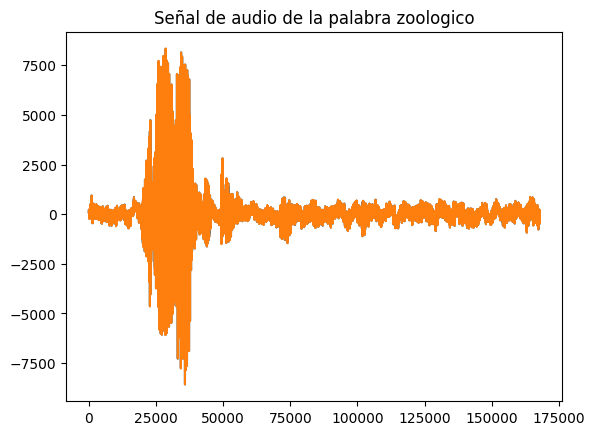

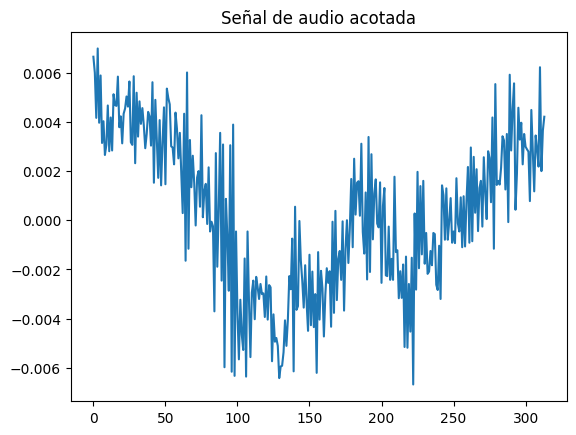

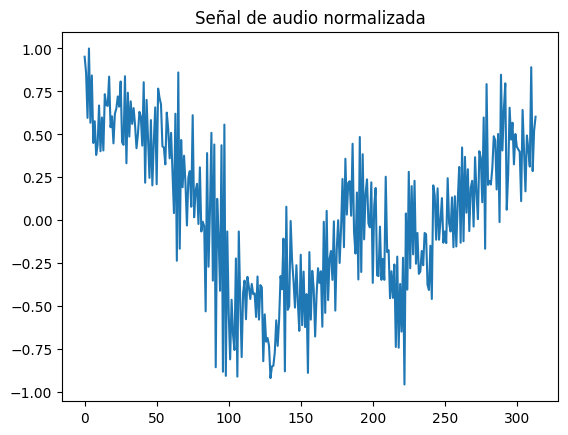

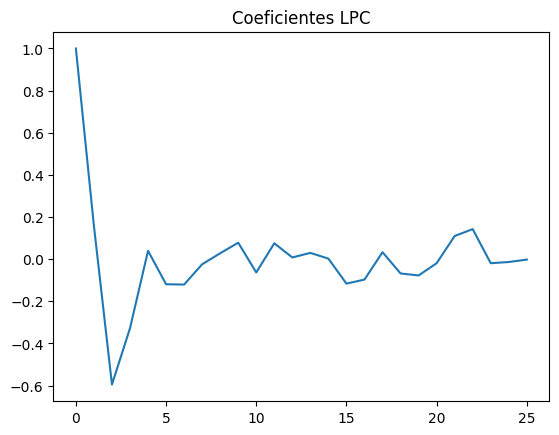

In [40]:
index = 1

sound = data_sound[index][1]

plt.plot(sound)
plt.title("Señal de audio de la palabra zoologico")
plt.show()

sound_trimmed = data_sound_bounded[index]

plt.plot(sound_trimmed)
plt.title("Señal de audio acotada")
plt.show()

sound_normalized = data_sound_normalized[index]

plt.plot(sound_normalized)
plt.title("Señal de audio normalizada")
plt.show()

lpc_coefficients = data_lpc_coefficients[index]

plt.plot(lpc_coefficients)
plt.title("Coeficientes LPC")
plt.show()

/tmp/ipykernel_15120/12322347.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


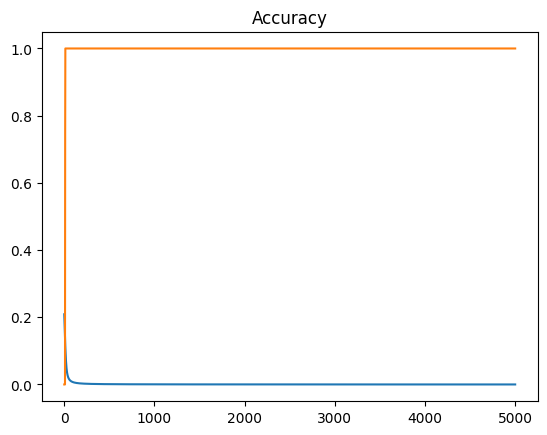

Test accuracy: 1.0


In [41]:
# NN Backpropagation

X_train = np.array(data_lpc_coefficients)
y_train = np.array([1, 1, 1, 1])

# Inicializacion de parametros
learning_rate = 0.1
iterations = 5000
N = y_train.size

input_size = len(data_lpc_coefficients[0])
hidden_size = 21
output_size = 5

# Inicializacion de los pesos
np.random.seed(10)

# Capa oculta
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# Capa de salida
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

# Funciones auxiliares
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    y_true_one_hot = np.eye(output_size)[y_true]
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)
    error = ((y_pred - y_true_reshaped) ** 2).sum() / (2 * y_pred.size)
    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=['mse', 'accuracy'])

# Entrenamiento
for itr in range(iterations):
    # Propagacion hacia adelante
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculo del error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({ 'mse': [mse], 'accuracy': [acc] })
    results = pd.concat([results, new_row], ignore_index=True)

    # Retropropagacion
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Actualizacion de los pesos
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

results.mse.plot(title='Mean Squared Error')
results.accuracy.plot(title='Accuracy')
plt.show()

# Prueba

filename = 'zoologico-5.wav'

sound_trimmed = util_vc.get_audio_signal_bounded(filename)
sound_normalized = util_vc.normalize(sound_trimmed)
lpc_coefficients = util_vc.get_lpc_coefficients(sound_normalized, 25)

X_test = np.array([lpc_coefficients])
y_test = np.array([1])

Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print(f'Test accuracy: {test_acc}')
